In [8]:
from datetime import datetime as dt
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_7 = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']

base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

In [9]:
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")


In [15]:
def plot_logistic_regression_diffrent_params(
        on_end: bool,
        cut: int,
        task: str,
        time_str: str,
        local_base_path: str,
        res_csvs_list: List[str],
        names: List[str],
        out_path: str,
):
    min_r2_train = 100
    min_r2_test = 100
    min_r2_loss = 100
    max_r2_train = -100
    max_r2_test = -100
    max_r2_loss = -100
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 9))
    for i, csv_name in sorted(enumerate(res_csvs_list)):
        all_results = pd.read_csv(f"{res_folder}/{csv_name}")
        all_results['log loss'] = np.log2(all_results['losses'])
        if on_end:
            zommed_all_results = all_results[-cut:]
        else:
            zommed_all_results = all_results[:cut]
        ax1.plot(zommed_all_results['Epoch'], zommed_all_results['log loss'], c=COLORS_20[i],
                 label=names[i], )
        ax2.plot(zommed_all_results['Epoch'], zommed_all_results['r2s test'], c=COLORS_20[i],
                 label=names[i], )
        ax3.plot(zommed_all_results['Epoch'], zommed_all_results['r2s train'], c=COLORS_20[i],
                 label=names[i], )
        min_r2_train = zommed_all_results['r2s train'].min() if zommed_all_results[
                                                                    'r2s train'].min() < min_r2_train else min_r2_train
        min_r2_test = zommed_all_results['r2s test'].min() if zommed_all_results[
                                                                  'r2s test'].min() < min_r2_test else min_r2_test
        min_r2_loss = zommed_all_results['log loss'].min() if zommed_all_results[
                                                                  'log loss'].min() < min_r2_loss else min_r2_loss
        max_r2_train = zommed_all_results['r2s train'].max() if zommed_all_results[
                                                                    'r2s train'].max() > max_r2_train else max_r2_train
        max_r2_test = zommed_all_results['r2s test'].max() if zommed_all_results[
                                                                  'r2s test'].max() > max_r2_test else max_r2_test
        max_r2_loss = zommed_all_results['log loss'].max() if zommed_all_results[
                                                                  'log loss'].max() > max_r2_loss else max_r2_loss
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('log loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R2 - test')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('R2 - train')
    ax1.legend(title='regularization factor')
    ax2.legend(title='regularization factor')
    ax3.legend(title='regularization factor')
    ax1.set_title(
        f"Performance over time of logistic regression predicting the mean performance, {task}\n",
        loc='center',
        wrap=True)
    plt.savefig(
        f"{local_base_path}/{out_path}/{time_str}_{task}_logistic_regression__performance_{cut}.png")
    plt.show()

In [22]:
res_folder = f"{base_path}/teach_archs/retina/retina_teach_archs_logistic_regression_results"
out_path = f"plots/retina_teach_archs_logistic_regression_results"
task = 'retina'
res_csvs = [
    "retina_2023-04-24-12-02-46_lr_0.001_bs_512_lm_1.0_output_meta_only.csv",
    "retina_2023-04-24-12-02-46_lr_0.005_bs_512_lm_3.0_output_meta_only.csv",
    "retina_2023-04-24-12-03-10_lr_0.001_bs_512_lm_0.5_output_meta_only.csv",
    "retina_2023-04-24-12-03-22_lr_0.001_bs_512_lm_2.0_output_meta_only.csv",
]
on_end = True
cut = 200

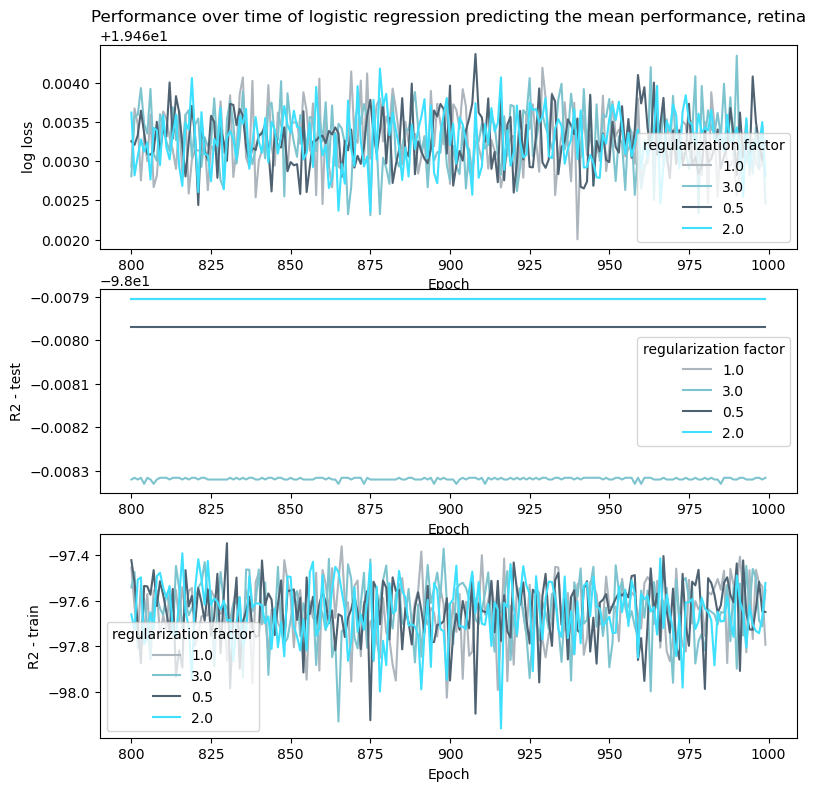

In [23]:
lamdas = [
    csv_name.split('lm_')[1].split('_')[0]
    for i, csv_name in enumerate(res_csvs)
]
plot_logistic_regression_diffrent_params(
    on_end=on_end,
    cut=cut,
    task=task,
    time_str=time_str,
    local_base_path=local_base_path,
    res_csvs_list=res_csvs,
    out_path=out_path,
    names=lamdas,
)

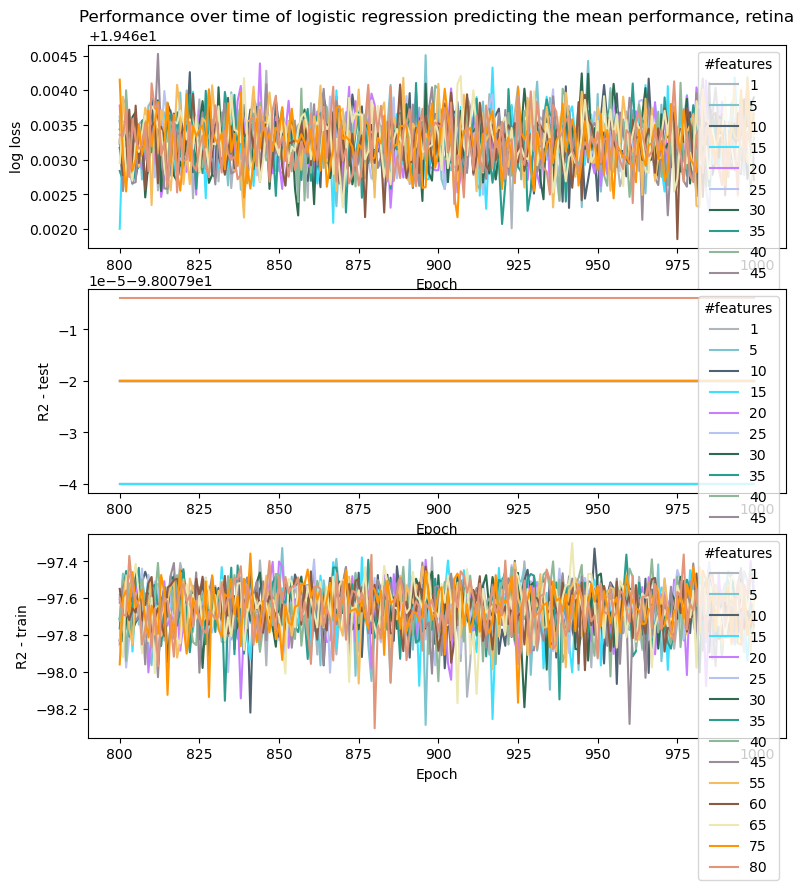

In [24]:
res_folder = f"{base_path}/teach_archs/retina/retina_teach_archs_logistic_regression_results"
out_path = f"plots/retina_teach_archs_logistic_regression_results"
task = 'retina'
res_csvs = [
    "retina_2023-05-16-14-08-36_lr_0.001_bs_512_lm_0.5_output_1_features.csv",
    "retina_2023-05-16-14-08-36_lr_0.001_bs_512_lm_0.5_output_5_features.csv",
    "retina_2023-05-16-14-08-35_lr_0.001_bs_512_lm_0.5_output_10_features.csv",
    "retina_2023-05-16-14-18-28_lr_0.001_bs_512_lm_0.5_output_15_features.csv",
    "retina_2023-05-16-14-18-28_lr_0.001_bs_512_lm_0.5_output_20_features.csv",
    "retina_2023-05-16-14-18-28_lr_0.001_bs_512_lm_0.5_output_25_features.csv",
    "retina_2023-05-16-14-18-21_lr_0.001_bs_512_lm_0.5_output_30_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_35_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_40_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_45_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_55_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_60_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_65_features.csv",
    "retina_2023-05-16-14-18-29_lr_0.001_bs_512_lm_0.5_output_75_features.csv",
    "retina_2023-05-16-14-18-28_lr_0.001_bs_512_lm_0.5_output_80_features.csv",
]
names = [
    csv_name.split('output_')[1].split('_')[0]
    for i, csv_name in enumerate(res_csvs)
]
plot_logistic_regression_diffrent_params(
    on_end=on_end,
    cut=cut,
    task=task,
    time_str=time_str,
    local_base_path=local_base_path,
    res_csvs_list=res_csvs,
    out_path=out_path,
    names=names,
)


In [25]:
pd.read_csv(
    "/Volumes/noamaz/modularity/teach_archs/retina/retina_teach_archs_logistic_regression_results/retina_2023-04-24-12-02-46_lr_0.001_bs_512_lm_1.0_output_meta_only.csv", )

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/noamaz/modularity/teach_archs/retina/retina_teach_archs_logistic_regression_results/retina_2023-04-24-12-02-46_lr_0.001_bs_512_lm_1.0_output_meta_only.csv'

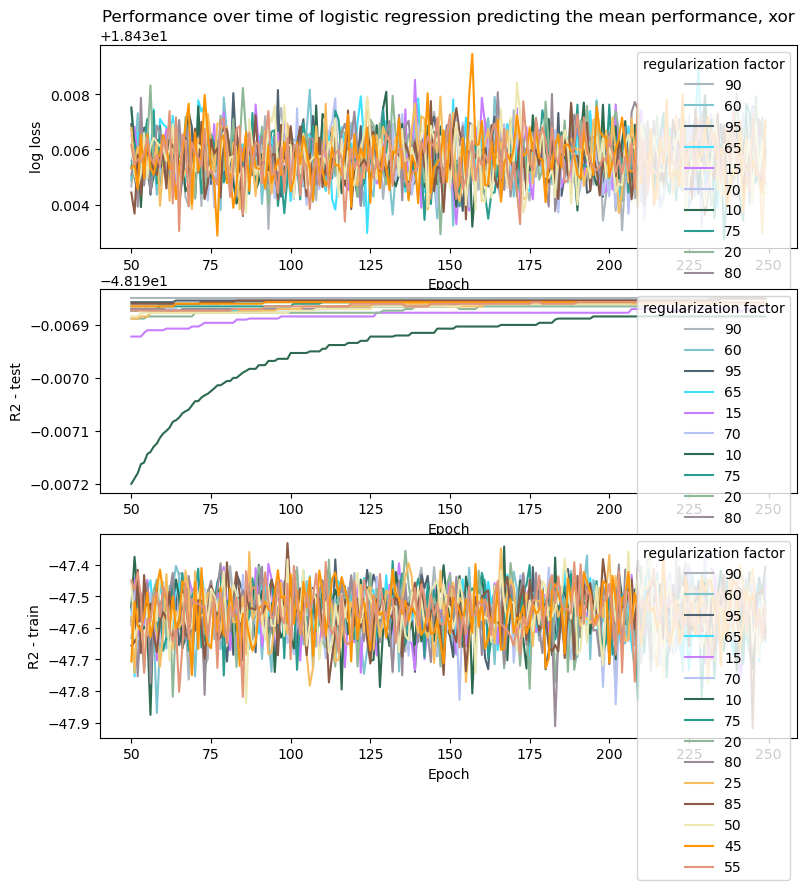

In [16]:
res_folder = f"{base_path}/teach_archs/xors/xor_teach_archs_logistic_regression_results"
out_path = f"plots/xor_teach_archs_logistic_regression_results"
task = 'xor'
on_end = True
cut = 200
res_csvs = [
    "xors_2023-05-16-16-22-18_lr_0.001_bs_512_lm_0.5_output_90_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_60_features.csv",
    "xors_2023-05-16-16-22-18_lr_0.001_bs_512_lm_0.5_output_95_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_65_features.csv",
    "xors_2023-05-16-16-22-19_lr_0.001_bs_512_lm_0.5_output_15_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_70_features.csv",
    "xors_2023-05-16-16-22-20_lr_0.001_bs_512_lm_0.5_output_10_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_75_features.csv",
    "xors_2023-05-16-16-22-20_lr_0.001_bs_512_lm_0.5_output_20_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_80_features.csv",
    "xors_2023-05-16-16-22-20_lr_0.001_bs_512_lm_0.5_output_25_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_85_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_50_features.csv",
    "xors_2023-05-16-16-22-37_lr_0.001_bs_512_lm_0.5_output_45_features.csv",
    "xors_2023-05-16-16-22-21_lr_0.001_bs_512_lm_0.5_output_55_features.csv",
]
names = [
    csv_name.split('output_')[1].split('_')[0]
    for i, csv_name in enumerate(res_csvs)
]
plot_logistic_regression_diffrent_params(
    on_end=on_end,
    cut=cut,
    task=task,
    time_str=time_str,
    local_base_path=local_base_path,
    res_csvs_list=res_csvs,
    out_path=out_path,
    names=names,
)
